In [20]:
import torch
from torch import nn, sigmoid, optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [21]:
class XORData(Dataset):
    def __init__(self, N=100):
        self.x = torch.zeros((N, 2))
        self.y = torch.zeros((N, 1))
        for i in range(N // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N // 4, 0] = torch.Tensor([1.0])

            self.x[i + N // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N // 2, 0] = torch.Tensor([1.0])

            self.x[i + 3 * N // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N, 2))
        self.len = N

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the data
    def plot_points(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()
        plt.show()


In [22]:
class Net(nn.Module):
    def __init__(self, IN, H, OUT):
        super(Net, self).__init__()
        self.hidden = nn.Linear(IN, H)
        self.output = nn.Linear(H, OUT)

    def forward(self, x):
        z1 = self.hidden(x)
        a1 = sigmoid(z1)
        z2 = self.output(a1)
        y_hat = sigmoid(z2)
        return y_hat

In [23]:
import numpy as np

In [24]:
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())


def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss
            total += loss.item()
        print(f"Epoch {epoch} finished\n\tAccuracy: {accuracy(model, data_set)}\n\tCost: {total}\n##########")
        ACC.append(accuracy(model, data_set))
        COST.append(total)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

    return COST

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
def plot_decision_regions_2class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

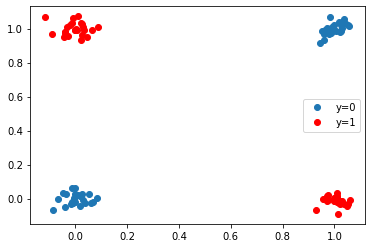

In [27]:
data_set = XORData()
data_set.plot_points()

Epoch 0 finished
	Accuracy: 0.5
	Cost: 78.31226316094398
##########
Epoch 1 finished
	Accuracy: 0.5
	Cost: 74.32701882719994
##########
Epoch 2 finished
	Accuracy: 0.5
	Cost: 73.72158175706863
##########
Epoch 3 finished
	Accuracy: 0.5
	Cost: 73.3765179514885
##########
Epoch 4 finished
	Accuracy: 0.5
	Cost: 73.07463431358337
##########
Epoch 5 finished
	Accuracy: 0.5
	Cost: 72.77104079723358
##########
Epoch 6 finished
	Accuracy: 0.5
	Cost: 72.43474543094635
##########
Epoch 7 finished
	Accuracy: 0.75
	Cost: 72.02112191915512
##########
Epoch 8 finished
	Accuracy: 0.75
	Cost: 71.44353640079498
##########
Epoch 9 finished
	Accuracy: 0.75
	Cost: 70.51107135415077
##########
Epoch 10 finished
	Accuracy: 0.75
	Cost: 68.86391267180443
##########
Epoch 11 finished
	Accuracy: 0.75
	Cost: 66.16190472245216
##########
Epoch 12 finished
	Accuracy: 0.75
	Cost: 62.7304190993309
##########
Epoch 13 finished
	Accuracy: 0.75
	Cost: 59.516480177640915
##########
Epoch 14 finished
	Accuracy: 0.75
	Cos

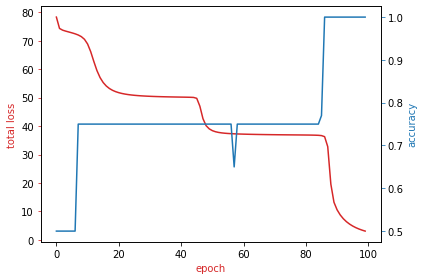

C:\Users\benja\AppData\Local\Temp/ipykernel_18896/373201577.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)


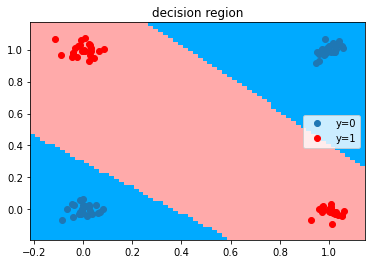

In [31]:
# less than three neurons cannot solve this problem
model = Net(2, 3, 1)

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_2class(model, data_set)

Epoch 0 finished
	Accuracy: 0.5
	Cost: 85.68703469634056
##########
Epoch 1 finished
	Accuracy: 0.5
	Cost: 80.29592469334602
##########
Epoch 2 finished
	Accuracy: 0.5
	Cost: 78.167043030262
##########
Epoch 3 finished
	Accuracy: 0.5
	Cost: 76.5099747478962
##########
Epoch 4 finished
	Accuracy: 0.5
	Cost: 74.99363765120506
##########
Epoch 5 finished
	Accuracy: 0.5
	Cost: 73.73178145289421
##########
Epoch 6 finished
	Accuracy: 0.75
	Cost: 72.59624192118645
##########
Epoch 7 finished
	Accuracy: 0.75
	Cost: 71.37555986642838
##########
Epoch 8 finished
	Accuracy: 0.75
	Cost: 69.88753405213356
##########
Epoch 9 finished
	Accuracy: 0.75
	Cost: 67.94516682624817
##########
Epoch 10 finished
	Accuracy: 0.75
	Cost: 65.43908843398094
##########
Epoch 11 finished
	Accuracy: 0.75
	Cost: 62.528478130698204
##########
Epoch 12 finished
	Accuracy: 0.75
	Cost: 59.64452049136162
##########
Epoch 13 finished
	Accuracy: 0.75
	Cost: 57.14777695387602
##########
Epoch 14 finished
	Accuracy: 0.75
	Cos

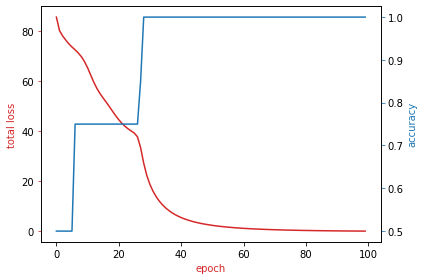

C:\Users\benja\AppData\Local\Temp/ipykernel_18896/373201577.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)


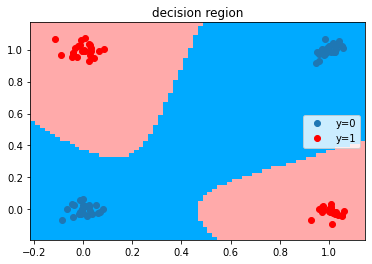

In [32]:
# now we are possibly overfitting to the data
model = Net(2, 8, 1)

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
plot_decision_regions_2class(model, data_set)